In [9]:
import numpy as np
import matplotlib.pyplot as plt


### Generate Correlated Data in 2D

In [10]:
## First, we  generate the 2d box with 1000 random points: 
N1 = 1000 # Number of random points
h1 = 100 # height 
w1 = 100 # width
def f_rand(N,w,h): 
    s = [[], []]
    for i in range(N):
        x = np.random.uniform(0,w)
        y = np.random.uniform(0,h)  
        x = x % w # periodicity condition
        y = y % h
        s[0].append(x)
        s[1].append(y)
    return s

R = f_rand(N1,w1,h1)


(0.0, 100.0)

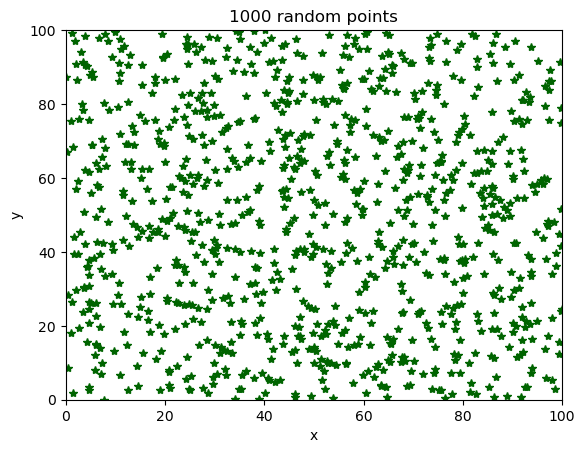

In [11]:
# the plot is the following
X_rand = R[0]
Y_rand = R[1]
plt.plot(X_rand,Y_rand,'*',c='darkgreen')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1000 random points')
plt.xlim(0, w1)
plt.ylim(0, h1)

In [12]:
c_num = 20  # circumferences
c_rad = 30  # radius 
#now we define another function for the points per circumferences
def f_centers(center_x, center_y,z,r):
    s = [[], []]
    for _ in range(z):
        theta = np.linspace(0, 2*np.pi)  
        x = center_x + r*np.cos(theta)
        y = center_y+  r*np.sin(theta)
        x = x % w1
        y = y % h1
        s[0].extend(x)
        s[1].extend(y)
    return s



(0.0, 100.0)

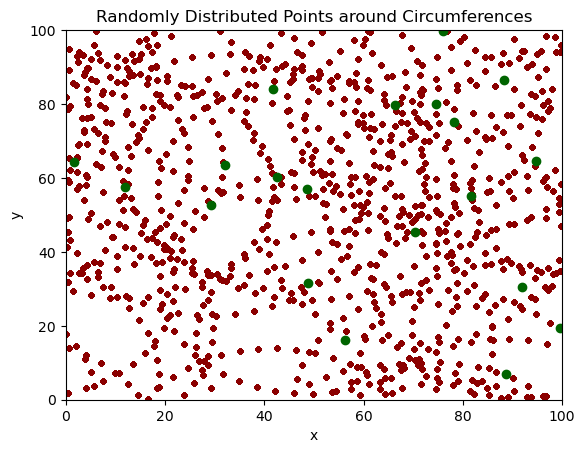

In [13]:
# using the function of the random points for the centers

c = f_rand(c_num,w1,h1)
z1 = N1//c_num # points per circumferences
D = [[], []]
for i in range(c_num):
    circumference_points  = f_centers(c[0][i],c[1][i],z1,c_rad)
    D[0].extend(circumference_points[0])
    D[1].extend(circumference_points[1])


D[0].extend(c[0])
D[1].extend(c[1])

#the plot fot the circumferences is 
n_x = D[0]
n_y = D[1]
c_x = c[0]
c_y = c[1]
plt.plot(n_x,n_y, '.', c='darkred')
plt.plot(c_x,c_y, 'o', c='darkgreen')
plt.title('Randomly Distributed Points around Circumferences')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0, w1)
plt.ylim(0, h1)



In [39]:
n_circumferences = 20 # Number of circumferences and points per circumference
r = 30 # Radius of the circunferences
n_points = 1000
n_points_per_circumference = n_points // n_circumferences # Number of points per circumference
num_bins = 200 # Numero de bins
box_width = 100
box_height = 100
dist_max = np.sqrt(box_width**2 + box_height**2)

In [41]:
# Función generadora de puntos aleatorios alrededor de los centros
def generate_points_around_center(cx, cy, n_points_per_circumference, radius):
    points = [[], []]
    for _ in range(n_points_per_circumference):
        angle = np.random.uniform(0, 2 * np.pi)
        x = cx + radius * np.cos(angle)
        y = cy + radius * np.sin(angle)
# Periodicidad de los puntos en la caja
        x = x % box_width
        y = y % box_height
        #Add centers
        points[0].append(x)
        points[1].append(y)
    return points

# Generate random centers for the circumferences (usando la función del inciso 1)
centers =f_rand(n_circumferences, box_width, box_height)

# Generate points around each center
D = [[], []]
for i in range(n_circumferences):
    points = generate_points_around_center(centers[0][i], centers[1][i], n_points_per_circumference, r)
    D[0].extend(points[0])
    D[1].extend(points[1])
    
# Add the centers to the list
D[0].extend(centers[0])
D[1].extend(centers[1])
len(D)

2

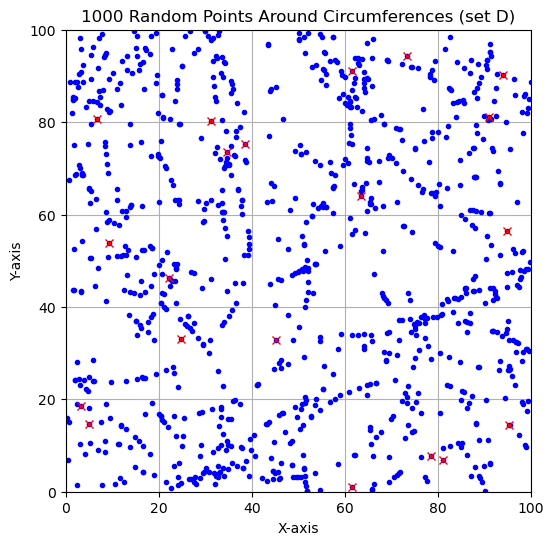

In [42]:
# Plot the generated points
plt.figure(figsize=(6, 6))
plt.plot(D[0], D[1], '.', c='blue')
plt.plot(centers[0], centers[1], 'x', c='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'{n_points} Random Points Around Circumferences (set D)')
plt.xlim(0, box_width)
plt.ylim(0, box_height)
plt.grid(True)
# plt.legend()
plt.show()


In [50]:
 # Distancia máxima entre dos puntos
# Función para calcular histograma de un set
def func_histogram(b,d):
    dbin = dist_max/b # Tamaño de los bins
    bins = np.array([(dbin/2) + (i*dbin) for i in range(b)]) # Centros de los bins
    f = np.zeros(b) # Frecuency del histograma
    d_1 = len(d[0])
# Calculo de las distancias
    for i in range(d_1):
        # Primer punto
        x1 = d[0][i]
        y1 = d[1][i]
        for j in range(i+1, d_1):
            # Segundo punto
            x2 = d[0][j]
            y2 = d[1][j]
            distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            correspond_bin = int(distance/dbin) # Bin correspondiente
            f[correspond_bin]+=1 # Agrega +1 valor a la frecuency
    return [bins, f] # bins and frecuency 




In [29]:
RR = func_histogram(num_bins,R)
RR[1] = RR[1]/sum(RR[1])
sum(RR[1])

0.9999999999999996

Text(0.5, 1.0, 'Histogram of Distances for set R')

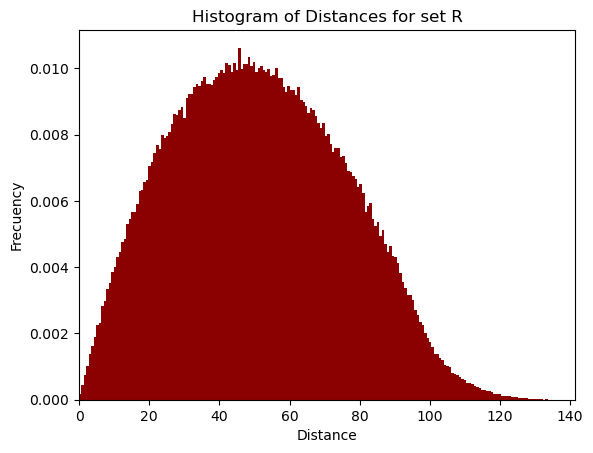

In [36]:
plt.bar(RR[0], RR[1], color='darkred')
plt.xlim(0,dist_max)
plt.xlabel('Distance')
plt.ylabel('Frecuency')
plt.title('Histogram of Distances for set R')

In [51]:
# Histograma DD
DD = func_histogram(num_bins,D)
# Normalizando el set
DD[1] = DD[1]/sum(DD[1])
# Prueba de la suma
sum(DD[1])

1.0

In [ ]:
# Plot the histogram
plt.figure(figsize=(6, 6))
plt.bar(DD[0], DD[1], color='blue')
plt.xlim(0,dist_max)
plt.xlabel('Distance')
plt.ylabel('Frecuency')
plt.title('Histogram of Distances for set D')
plt.grid(True)
plt.show()

Sum of normalized histogram bins: 0.9999999999999998


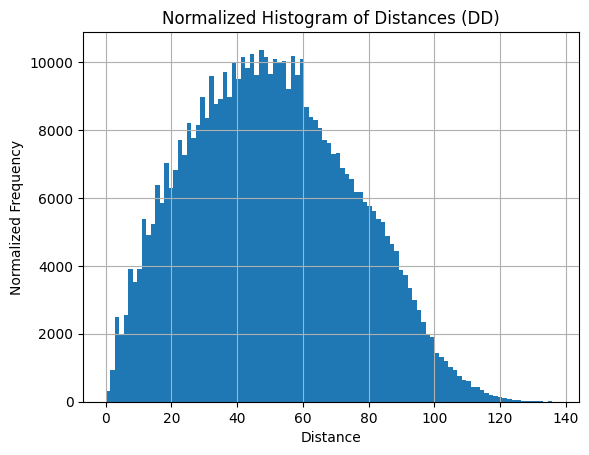

In [ ]:
num_bins = 100 #len(distance_D)
hist_min = min(D[0])
hist_max = max(D[0])

hist1, bin_edges1 = np.histogram(distance_D, bins=num_bins, range=(hist_min, hist_max))


DD = hist1/np.sum(hist1)

# Verify that the sum of all bins adds up to approximately 1
print("Sum of normalized histogram bins:", np.sum(DD))


plt.bar(bin_edges1[:-1], hist1, width=bin_edges1[1]-bin_edges1[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of Distances (DD)')
plt.grid(True)
plt.show()


In [ ]:
# Plot histogram
#plt.hist(distance_D, bins=num_bins, range=(hist_min, hist_max), alpha=0.7, color='blue')
#plt.xlabel('Distance')
#plt.ylabel('Frequency')
#plt.title('Histogram of Distances between 2D Points')
#plt.grid(True)
#plt.show()


In [ ]:
distance_R = []

for i in range(num_points): 
    for j in range(i+1,num_points): 
        distance = f_distance(R[i],R[j])
        distance_R.append(distance)




Sum of normalized histogram bins: 1.0


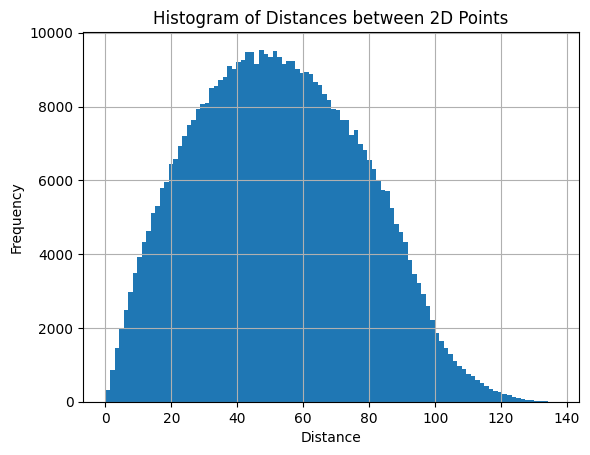

In [ ]:
histR_min = min(distance_R)
histR_max = max(distance_R)

hist2, bin_edges2 = np.histogram(distance_R, bins=num_bins, range=(histR_min, histR_max))

RR = hist2/np.sum(hist2)

print("Sum of normalized histogram bins:", np.sum(RR))

plt.bar(bin_edges2[:-1], hist2, width=bin_edges2[1]-bin_edges2[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between 2D Points')
plt.grid(True)
plt.show()


Sum of normalized histogram bins (DR): 0.9999999999999999


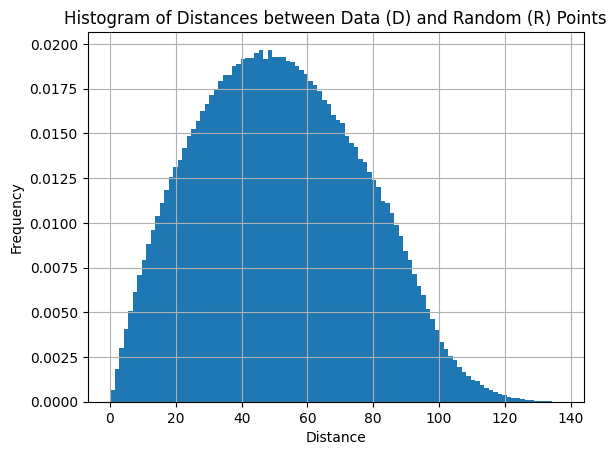

In [ ]:

distance_dr = []
for d_point in D:
    for r_point in R:
        distance  = f_distance(d_point, r_point)
        distance_dr.append(distance)

num_bins = 100  # Adjust this value for your desired number of bins
histdr_min = min(distance_dr)
histdr_max = max(distance_dr)

distance_dr_norm = distance_dr/np.sum(distance_dr) 
histdr_min_norm = min(distance_dr_norm)
histdr_max_norm = max(distance_dr_norm)

# Create histogram
hist_DR, bin_edges_DR = np.histogram(distance_dr, bins=num_bins, range=(histdr_min, histdr_max))

DR = hist_DR/np.sum(hist_DR)


# Verify that the sum of all bins adds up to approximately 1
print("Sum of normalized histogram bins (DR):", np.sum(DR))


# Plot histogram
plt.bar(bin_edges_DR[:-1], DR, width=bin_edges_DR[1]-bin_edges_DR[0], align='edge')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Distances between Data (D) and Random (R) Points')
plt.grid(True)
plt.show()


In [ ]:
DR 

array([6.8100e-04, 1.8150e-03, 2.9930e-03, 4.0480e-03, 5.0760e-03,
       6.1250e-03, 7.0800e-03, 7.9420e-03, 8.7980e-03, 9.5890e-03,
       1.0370e-02, 1.1081e-02, 1.1848e-02, 1.2541e-02, 1.3094e-02,
       1.3538e-02, 1.4169e-02, 1.4835e-02, 1.5255e-02, 1.5681e-02,
       1.6267e-02, 1.6661e-02, 1.7118e-02, 1.7431e-02, 1.7916e-02,
       1.8268e-02, 1.8246e-02, 1.8768e-02, 1.8898e-02, 1.9163e-02,
       1.9209e-02, 1.9225e-02, 1.9515e-02, 1.9674e-02, 1.9153e-02,
       1.9645e-02, 1.9256e-02, 1.9282e-02, 1.9262e-02, 1.9063e-02,
       1.9001e-02, 1.8785e-02, 1.8542e-02, 1.8341e-02, 1.7917e-02,
       1.7689e-02, 1.7381e-02, 1.6879e-02, 1.6655e-02, 1.6032e-02,
       1.5742e-02, 1.5566e-02, 1.4833e-02, 1.4450e-02, 1.4225e-02,
       1.3592e-02, 1.3409e-02, 1.2845e-02, 1.2369e-02, 1.1984e-02,
       1.1193e-02, 1.1101e-02, 1.0529e-02, 9.8880e-03, 9.2630e-03,
       8.4320e-03, 7.9250e-03, 7.1340e-03, 6.4910e-03, 5.9630e-03,
       5.2090e-03, 4.6360e-03, 4.0180e-03, 3.3570e-03, 2.9620e

In [ ]:
box_size = 100

bin_edges_DD = np.linspace(0, box_size * np.sqrt(2), len(DD) + 1)  # Adjust bin edges as needed
bin_edges_RR = np.linspace(0, box_size * np.sqrt(2), len(RR) + 1)  # Adjust bin edges as needed
bin_edges_DR = np.linspace(0, box_size * np.sqrt(2), len(DR) + 1)  # Adjust bin edges as needed

DDRR = DD*RR
R2 = R**2
# Peebles − Hauser estimator 
r = (bin_edges_DD[1:] + bin_edges_DD[:-1]) / 2  # Bin centers
corr_function_ph = (DD/RR) - 1

# Davis − Peebles estimator
corr_function_dp = (DD/DR) - 1

# Hamilton estimator 
corr_function_h = (DDRR)/R2 -1 

# Landy − Szalay
corr_function_ls = (DD - 2*DR+RR)/RR






ValueError: operands could not be broadcast together with shapes (100,) (1000,2) 

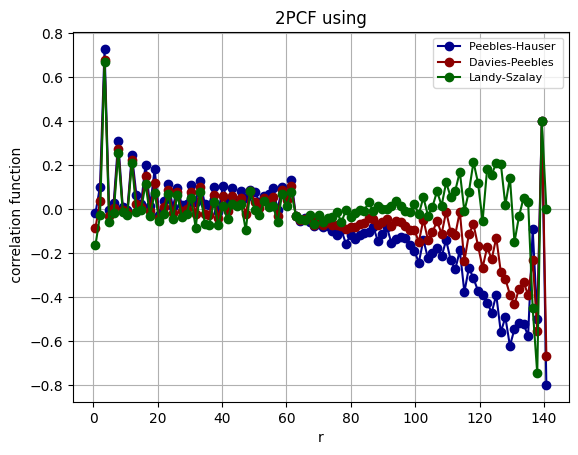

In [ ]:

plt.plot(r, corr_function_ph,  marker='o', color='darkblue', linestyle='-', label='Peebles-Hauser ')
plt.plot(r, corr_function_dp,  marker='o', color='darkred',  linestyle='-',label='Davies-Peebles ',)
plt.plot(r, corr_function_ls,  marker='o', color='darkgreen',linestyle='-',label='Landy-Szalay',)
plt.xlabel('r')
plt.ylabel(' correlation function')
plt.legend(fontsize=8)
plt.title('2PCF using')
plt.grid(True)

In [ ]:
# 4) Test randoms 

## First, we generate the 2d box with 1000 random points: 
n_1 = 2000
n_2 = 5000
n_3 = 10000
h = 100 # height 
w = 100 # width


def f_rand1(n_1,h,w): 
    s = []
    for i in range(n_1):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s


def f_rand2(n_2,h,w): 
    s = []
    for i in range(n_2):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s

def f_rand3(n_3,h,w): 
    s = []
    for i in range(n_3):
        x = np.random.uniform(0,h)
        y = np.random.uniform(0,w)  
        x = x % h # periodicity condition
        y = y % w
        s.append((x,y))
    return s






(0.0, 100.0)

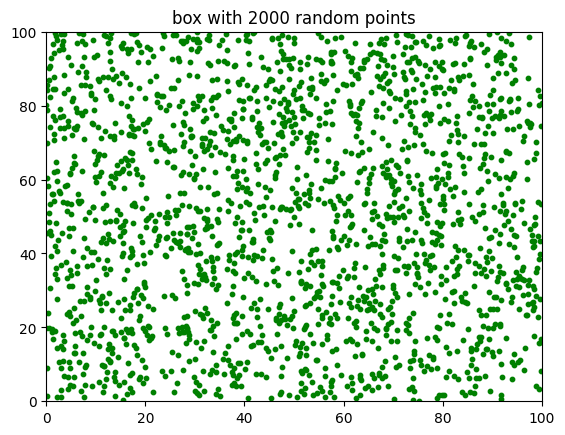

In [ ]:
Rx2 = np.array(f_rand1(n_1,h,w))
x_c2, y_c2 = zip(*Rx2)
plt.scatter(x_c2, y_c2,c='green',s=10)
plt.title('box with 2000 random points')
plt.xlim(0, w)
plt.ylim(0, h)

(0.0, 100.0)

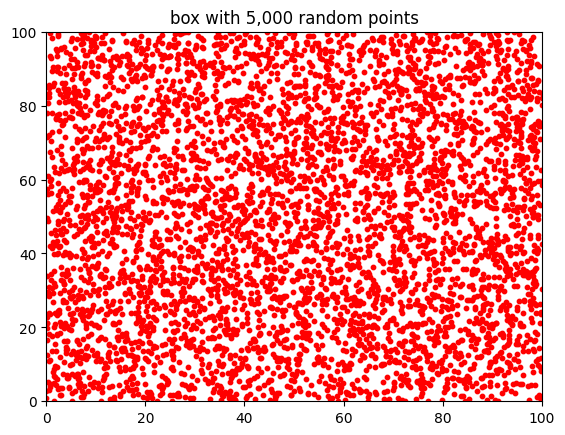

In [ ]:
Rx5 = np.array(f_rand1(n_2,h,w))
x_c5, y_c5 = zip(*Rx5)
plt.scatter(x_c5, y_c5,c='red',s=10)
plt.title('box with 5,000 random points')
plt.xlim(0, w)
plt.ylim(0, h)

(0.0, 100.0)

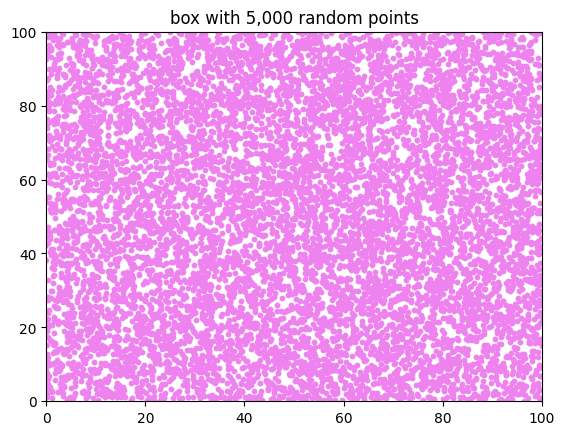

In [ ]:
Rx10 = np.array(f_rand1(n_3,h,w))
x_c10, y_c10 = zip(*Rx10)
plt.scatter(x_c10, y_c10,c='violet',s=10)
plt.title('box with 5,000 random points')
plt.xlim(0, w)
plt.ylim(0, h)

In [ ]:
size = 100  # Size of the 2D box (side length) #
c_num = 20  # Number of circumferences
r_c = 30

z2 = n_1 // c_num

# Create an empty list to store the points
D2 = []

# Generate random centers for the circumferences within the box
#circle_centers_x = np.array(f_rand(num_points,size,size))
#circle_centers_y = np.array(f_rand(num_points,size,size))
circle_x2 = np.random.uniform(r_c,2000,c_num)
circle_y2 = np.random.uniform(r_c,2000,c_num)

# Create points around each circumference
for i in range(c_num):
    center_x = circle_centers_x[i]
    center_y = circle_centers_y[i]

    for _ in range(z):
     
     theta = np.linspace(0, 2*np.pi)
     x = center_x + r_c*np.cos(theta)
     y = center_y + r_c*np.sin(theta)
     x = x % h 
     y = y % w 
    
    # Append the points to the list
    D.extend(list(zip(x, y)))



IndexError: index 2 is out of bounds for axis 0 with size 2